In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [46]:
df1=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/cubic_zirconia.csv') #Importing of Dataset

In [47]:
df1.head()  #Correctly imported 

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Data Dictionary:

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


In [48]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [49]:
df1.info()  # Datatype of few columns are object datatype. We will going to treat those columns at later stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [50]:
df1.describe()  #Looking into the data we can see there are some outliers. Examples :- price, x,y,z,carat. Moreover some
                # of the variables are normally distributed. Example- depth,table,x,y . We will further analyze the data.

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [51]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [52]:
df1[df1['depth'].isnull() == True ] #Checking records having NaN value 

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
185,0.43,Ideal,E,SI1,NaN,56.0,4.82,4.79,3.01,975
258,0.41,Ideal,I,IF,NaN,57.0,4.78,4.81,2.93,953
313,0.71,Premium,F,VS1,NaN,58.0,5.71,5.67,3.57,2879
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970
367,0.29,Very Good,I,VS2,NaN,55.0,4.25,4.27,2.66,384


### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [53]:
df1['depth'] = np.where(df1['depth'].isnull() == True , df1['depth'].mean(), df1['depth'] )
#Imputing NaN values with mean value for Depth column. 

In [54]:
for col in df1.columns:
    count=(df1[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))
    

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 3
Number of zero values for the y is 3
Number of zero values for the z is 9
Number of zero values for the price is 0


In [55]:

#There are records which have zeroes in it. It's an error value and has to be treated as well. As x,y,z cannot be zero for
#any zirconia as it defines length,breadth,height respectively.
df1[df1['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [56]:

#There are records for column z which has zeroes in it. This values can be accepted  as these records have x,y values which
#shows that these zirconia might be a thin sheet, hence height field is mentioned as zero. 
#But for the sake of calculation purpose we will going to impute all the x,y,z columns with their respective mean values,
df1[df1['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [57]:
df1['x']=np.where(df1['x'] == 0,df1['x'].mean(),df1['x'])
df1['y']=np.where(df1['y'] == 0,df1['y'].mean(),df1['y'])
df1['z']=np.where(df1['z'] == 0,df1['z'].mean(),df1['z'])
#Impute X,Y,Z columns with respective columns mean where ever the values are zero.

In [58]:
for col in df1.columns:
    count=(df1[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))
#No zero values present

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 0
Number of zero values for the y is 0
Number of zero values for the z is 0
Number of zero values for the price is 0


In [59]:
df1.isnull().sum()  #No null values present.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [60]:
df1.duplicated().sum() #34 Duplicated values

34

In [61]:
df1.drop_duplicates(inplace=True)

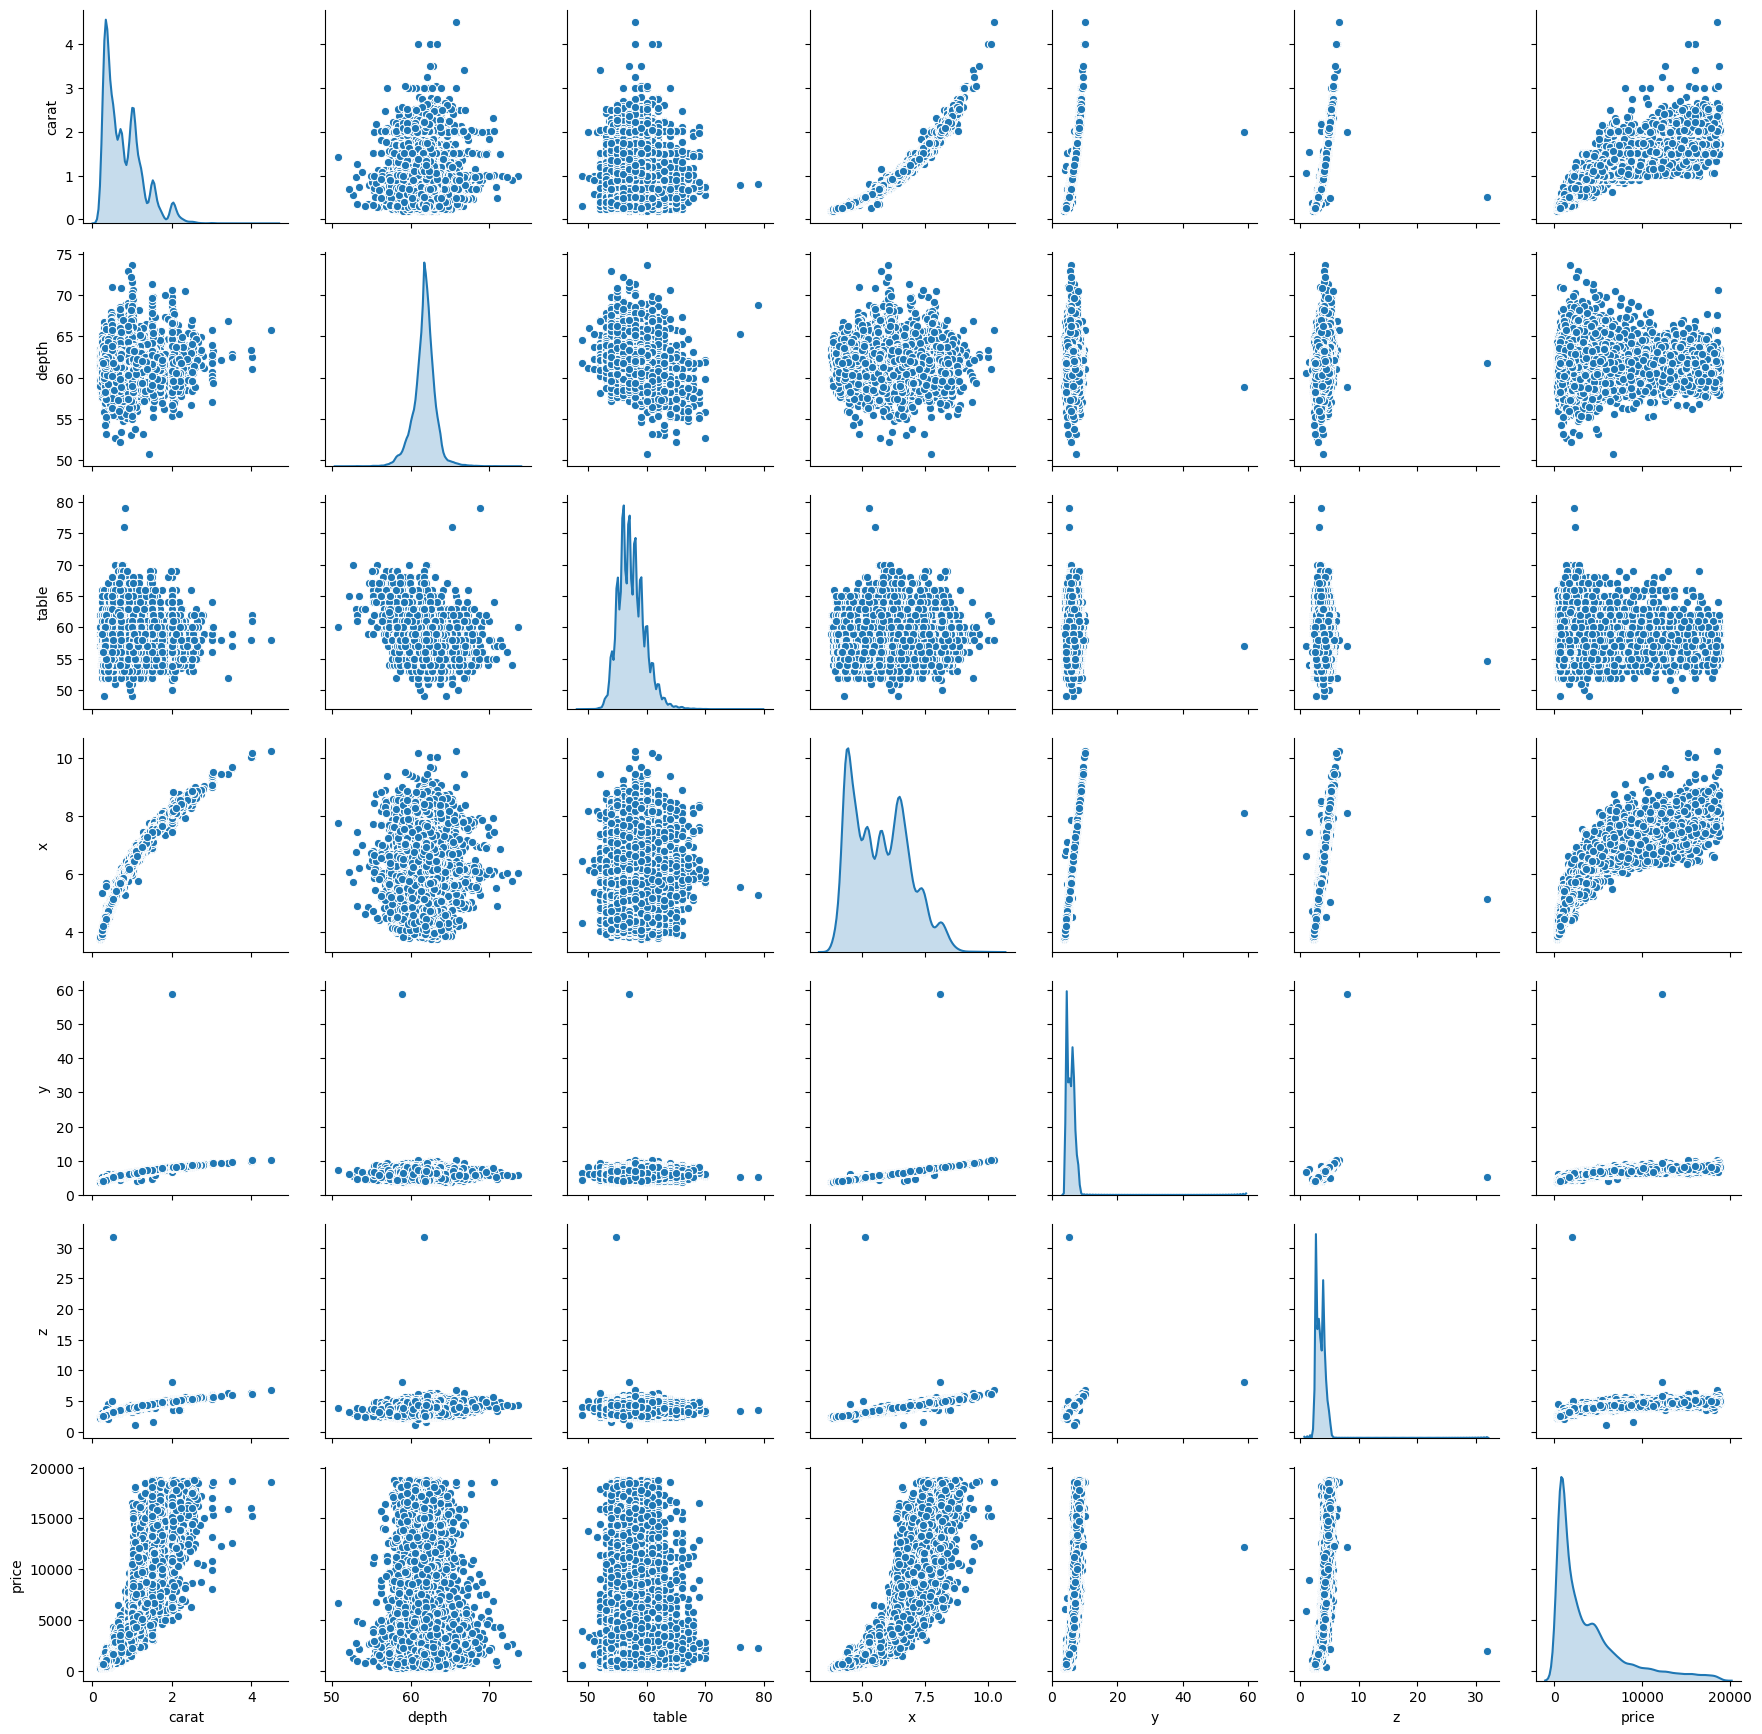

In [147]:
sns.pairplot(data=df1, diag_kind='kde')
#Point to be noted by looking at the pairplot
#1- There's a high correlation between independent variables such as x,y,z . This may create multicollinearity problem.
#2- There's a high linear correlation between dependent variables and independent variables. Except for depth and table.
#3- Variables such as depth , table , x are normally distributed. Other variables have skewness in it.


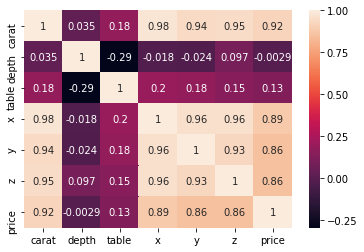

In [62]:
sns.heatmap(df1.corr(),annot=True)
#1)By looking at heatmap, we can further confirm the inferences that we made above. Correlations between DV price and IV ,
#carat,x,y,z are high. 
#2) Few of the above mentioned IV have high correlations between them.This may create a multicollinearity issue while creating
#model


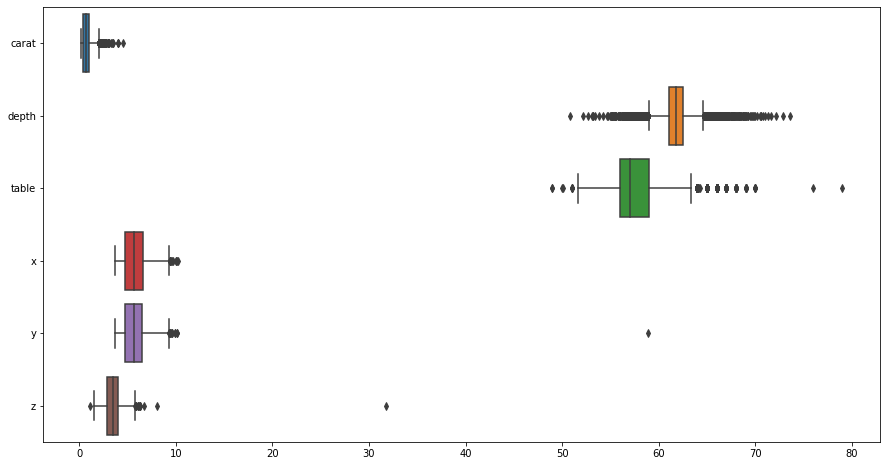

In [63]:
plt.figure(figsize=(15,8))  #Almost every features have outliers in it. We will treat them later.
sns.boxplot(data=df1[['carat','depth','table','x','y','z']] , orient='h')

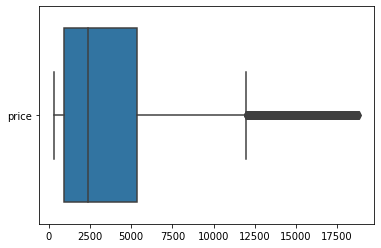

In [64]:
sns.boxplot(data=df1[['price']] , orient='h') 
#DV price has many outliers as well. We will treat them later.

In [65]:
#We will treat all the outliers by considering the distribution to be normally distributed and pulling back all the values
#withing the range of -3 to +3 Standard Deviation if any value is outside the range. 

In [66]:
from scipy.stats import zscore #Import zscore from scipy.stats

In [67]:
for col in df1.columns:  #Applying Zscore on those columns which are not object type
    if df1[col].dtype != 'object':
        df1[[col]] = df1[[col]].apply(zscore)
        

In [68]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))

#Counting number of records for each variable which are greater than and less than 3 & -3 respectively.

Records greater than 3 standard deviation for column carat is 208
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 195
Records less than -3 standard deviation column depth is 168
Records greater than 3 standard deviation for column table is 180
Records less than -3 standard deviation column table is 4
Records greater than 3 standard deviation for column x is 16
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 13
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 15
Records less than -3 standard deviation column z is 1
Records greater than 3 standard deviation for column price is 579
Records less than -3 standard deviation column price is 0


In [69]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        df1[[col]] = np.where(df1[[col]] > 3, 3,df1[[col]])
        df1[[col]] = np.where(df1[[col]] < -3, -3, df1[[col]] )
        
#pulling back all the values withing the range of -3 to +3 Standard Deviation if any value is outside the range. 

In [70]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))

#No such records present.

Records greater than 3 standard deviation for column carat is 0
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 0
Records less than -3 standard deviation column depth is 0
Records greater than 3 standard deviation for column table is 0
Records less than -3 standard deviation column table is 0
Records greater than 3 standard deviation for column x is 0
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 0
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 0
Records less than -3 standard deviation column z is 0
Records greater than 3 standard deviation for column price is 0
Records less than -3 standard deviation column price is 0


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null object
color      26933 non-null object
clarity    26933 non-null object
depth      26933 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


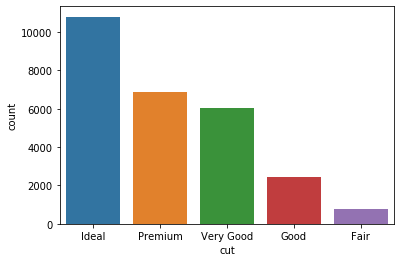

In [190]:
sns.countplot(df1['cut'],order=df1['cut'].value_counts().index)  # No. of Ideal zirconia has most numbers

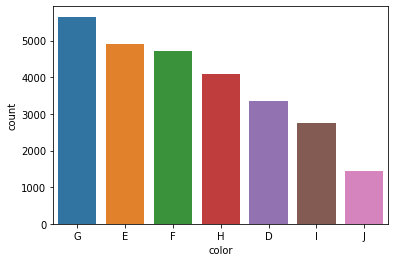

In [191]:
sns.countplot(df1['color'],order=df1['color'].value_counts().index) 
#G color zirconia is most in abundance. Followed by E & F respectively.
#With D being the best and J the worst.

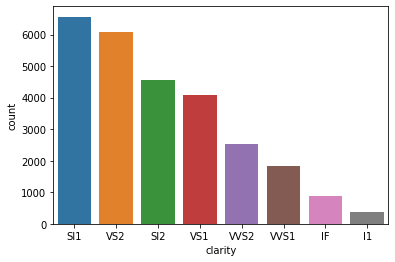

In [192]:

# Zirconia with Clarity corresponding to SI1 is most in number. Followed by VS2 and SI2
#Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. 
#In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
sns.countplot(df1['clarity'],order=df1['clarity'].value_counts().index)

In [193]:
#Changing datatype from Object to numeric and assigining a codes for each category

In [194]:
for col in df1.columns: 
    if df1[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df1[col].unique()))
        print(pd.Categorical(df1[col].unique()).codes)
        df1[col] = pd.Categorical(df1[col]).codes



Column Name: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


Column Name: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


Column Name: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [195]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043547,2,1,2,0.254493,0.243737,-1.296119,-1.240179,-1.225070,-0.854828
1,-0.980684,3,3,1,-0.678194,0.243737,-1.162935,-1.094126,-1.169310,-0.734256
2,0.213713,4,1,7,0.326238,1.139749,0.275449,0.332030,0.336203,0.584584
3,-0.792095,2,2,4,-0.104232,-0.652274,-0.807778,-0.802022,-0.806872,-0.709892
4,-1.022593,2,2,6,-0.965174,0.691743,-1.225087,-1.119900,-1.239010,-0.785219
5,0.465165,2,0,5,-0.175978,-0.652274,0.648363,0.649909,0.628942,1.383345
6,0.444210,1,4,2,1.402416,1.139749,0.550695,0.486674,0.684702,0.223363
7,-0.624461,3,1,2,-0.175978,2.035760,-0.568048,-0.578648,-0.583833,-0.627108
8,0.863297,1,4,2,1.474161,2.931771,0.879215,0.770187,1.005320,0.365316
9,-0.938776,2,2,5,-0.893429,-0.204268,-1.074146,-0.973848,-1.085670,-0.803367


In [196]:
df1.info()  # Datatype is changed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null int8
color      26933 non-null int8
clarity    26933 non-null int8
depth      26933 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null float64
dtypes: float64(7), int8(3)
memory usage: 3.0 MB


In [197]:
X=df1.drop('price',axis=1)  
Y=df1.pop('price')
#Separating Dependent and Independent Variable in X and Y variables

In [2]:
clf=LinearRegression()

In [3]:
from sklearn.model_selection import train_test_split
#Separating in Training and Testing set 

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [201]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf.coef_[idx]))


The coefficient for carat  is 1.481282677981137 
The coefficient for cut  is 0.010083917229463175 
The coefficient for color  is -0.06842218237395095 
The coefficient for clarity  is 0.06815170792216897 
The coefficient for depth  is -0.023274081905693467 
The coefficient for table  is -0.04942172234870567 
The coefficient for x  is -0.7432689437891166 
The coefficient for y  is 0.5869799283806294 
The coefficient for z  is -0.3244817634599856 


In [203]:
intercept=clf.intercept_
intercept

-0.1110817470111532

In [204]:
clf.score(X_train,y_train)

0.9023821032076993

In [205]:
clf.score(X_test,y_test)
#Overall accuracy score of Training and Testing Data is similar.

0.9022481677471148

### STATSMODEL

In [206]:
data_train=pd.concat([X_train,y_train],axis=1)
#Calculating same using STATSMODEL

In [207]:
data_train.info()
data_train.head()
#Imported correctly 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 8747 to 2732
Data columns (total 10 columns):
carat      18853 non-null float64
cut        18853 non-null int8
color      18853 non-null int8
clarity    18853 non-null int8
depth      18853 non-null float64
table      18853 non-null float64
x          18853 non-null float64
y          18853 non-null float64
z          18853 non-null float64
price      18853 non-null float64
dtypes: float64(7), int8(3)
memory usage: 1.2 MB


,carat,cut,color,clarity,depth,table,x,y,z,price
8747,0.821388,2,1,3,-1.108665,-0.204268,0.985762,0.976378,0.824101,0.442383
13821,-0.917821,2,0,5,-0.534703,-0.652274,-0.976478,-0.982439,-1.015971,-0.706909
13582,0.842343,1,5,2,0.971945,0.243737,0.825942,0.847509,0.949560,0.202481
9952,-1.169273,4,1,6,-0.749939,1.139749,-1.526970,-1.437779,-1.517808,-0.858308
25530,-0.624461,4,2,7,0.039258,-0.652274,-0.550290,-0.501326,-0.514133,-0.468747


In [4]:
import statsmodels.formula.api as smf

In [209]:
lm_train = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z ',data=data_train).fit()

In [210]:
lm_train.params


Intercept   -0.111082
carat        1.481283
cut          0.010084
color       -0.068422
clarity      0.068152
depth       -0.023274
table       -0.049422
x           -0.743269
y            0.586980
z           -0.324482
dtype: float64

In [211]:

#Here are the following observations :-
#1) R-square and Adjusted R-sqaure is giving us the good results.
#2) P values for all the variables are within significance level
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.935e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:40   Log-Likelihood:                -4369.6
No. Observations:               18853   AIC:                             8759.
Df Residuals:                   18843   BIC:                             8838.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1111      0.009    -12.880      0.0

In [212]:
mse_test=np.mean((clf.predict(X_test)-y_test)**2)
mse_train=np.mean(clf.predict(X_train)-y_train)**2
#Calculating Mean Squared Error
print('MSE for training is {} and testing is {}'.format(mse_train,mse_test))

MSE for training is 2.717818610753163e-34 and testing is 0.09273158174263757


In [213]:
import math

In [214]:
print('Root mean squared error for training is {} and Testing is {}'.format(math.sqrt(mse_train),math.sqrt(mse_test)))


Root mean squared error for training is 1.6485807868446007e-17 and Testing is 0.304518606562288


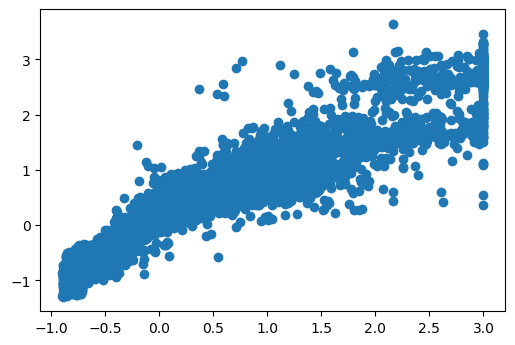

In [215]:
y_pred=clf.predict(X_test)
plt.rcParams['figure.dpi']=100
plt.scatter(y_test,y_pred)

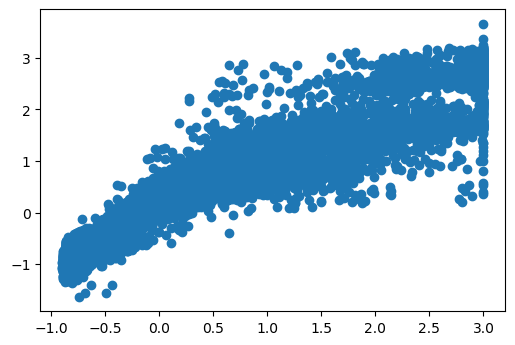

In [216]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train,clf.predict(X_train))

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Calculation of Variance Inflation Factor

In [218]:
#df1[['carat','cut','color','clarity','depth','table','x']]
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [219]:
#for column in df1[['carat','cut','color','clarity','depth','table','x']].columns:
i=0
for column in X.columns:
    if i < 9:
        print (column , "---> ", vif[i])
        i=i+1
        
#As we can observe there is multicollinearity present between the data. VIF should be less than 5 for each variables.
#But its very high x,y,z & carat variable. That was evident as well from heatmap. 
#We will try to create the model once again using only carat variable and ignoring x,y,z variables.

carat --->  28.82890352838194
cut --->  4.381301495179967
color --->  3.109208449263456
clarity --->  4.294162429840121
depth --->  4.552955241655365
table --->  1.1821081076742452
x --->  408.49361318189926
y --->  401.82542382311624
z --->  241.01782399612375


In [231]:
lm_train1= smf.ols(formula='price ~ carat + cut + color + clarity + depth + table ',data=data_train).fit()
#Recreating the formula by ignoring x,y,z variables. And calculating different parameters

In [232]:
print(lm_train1.summary())
#We can see there's minor changes in R squared value. Which means we can make model by using these variables as well.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.612e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:02:49   Log-Likelihood:                -5266.0
No. Observations:               18853   AIC:                         1.055e+04
Df Residuals:                   18846   BIC:                         1.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1602      0.009    -17.918      0.0

In [237]:
vif1=[variance_inflation_factor(X[['carat','cut','color','clarity','depth','table']].values,ix) 
 for ix in range(X[['carat','cut','color','clarity','depth','table']].shape[1])]

In [235]:
i=0
for column in X.columns:
    if i < 6:
        print (column , "---> ", vif1[i])
        i=i+1

#We can we see that all the  VIF values are within 5 which shows there's no collinearity present between dependent variables.

carat --->  1.1868019749222014
cut --->  4.353807740214415
color --->  3.1013271636146573
clarity --->  4.281423473034565
depth --->  1.1194921794320156
table --->  1.1611973695531603


### Lets make few more models and to see if we can achieve higher accuracy or not.By changing outlier treatment technique and doing some feature engineering

In [6]:
df3=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/cubic_zirconia.csv')

In [7]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df3['price'] = np.log(df3['price'])
#As price columns had very large magnitude, we lower it down by applying Log transformation on it.

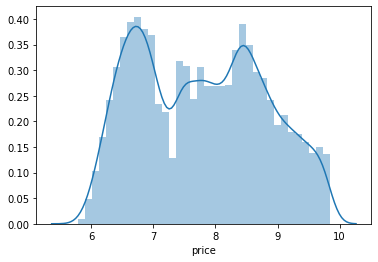

In [9]:
sns.distplot(df3['price'])
#Somewhat normally distributed

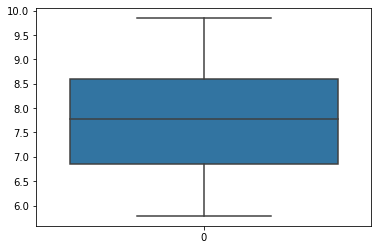

In [10]:
sns.boxplot(data=df3['price'])
#No outliers

In [11]:
df3.duplicated().sum()

34

In [12]:
df3.drop_duplicates(inplace=True)

In [13]:
df3.duplicated().sum()

0

In [14]:
df3.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
df3['depth'] = np.where(df3['depth'].isnull() == True , df3['depth'].mean(), df3['depth'] )

In [16]:
df3['x']=np.where(df3['x'] == 0,df3['x'].mean(),df3['x'])
df3['y']=np.where(df3['y'] == 0,df3['y'].mean(),df3['y'])
df3['z']=np.where(df3['z'] == 0,df3['z'].mean(),df3['z'])
#Impute X,Y,Z columns with respective columns mean where ever the values are zero.

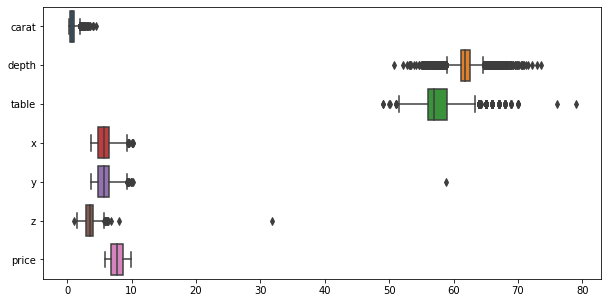

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df3,orient='h')

In [18]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df3[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df3[col]= np.where(df3[col] > Qmax, Qmax, df3[col] )
    df3[col]= np.where(df3[col] < Qmin, Qmin, df3[col] )

    #Defining a function to treat outliers

In [19]:
for col in df3.columns:
    if df3[col].dtype != 'object':
        outlier_treatment(col)

#Depth column has not been treated by the function. We will separately treat it.

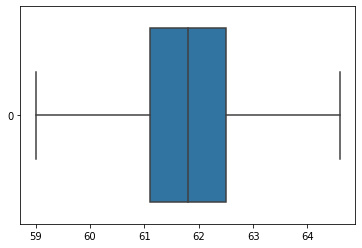

In [20]:
sns.boxplot(data=df3['depth'],orient='h')

In [21]:
Q1,Q3=df3['depth'].quantile(0.25),df3['depth'].quantile(0.75)
IQR=Q3-Q1
Qmax=Q3 + 1.5*IQR
Qmin=Q1 - 1.5*IQR
df3['depth']= np.where(df3['depth'] > Qmax, Qmax, df3['depth'] )
df3['depth']= np.where(df3['depth'] < Qmin, Qmin, df3['depth'] )

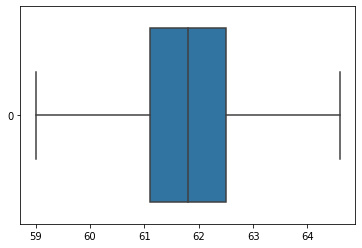

In [22]:
sns.boxplot(data=df3['depth'],orient='h')
#No outliers.

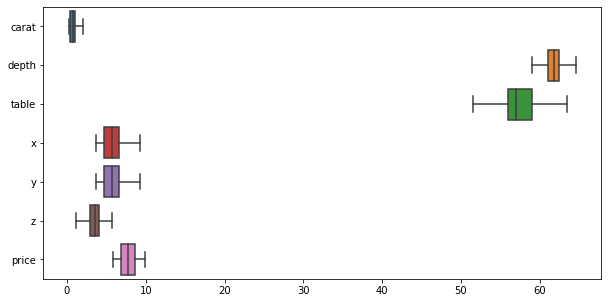

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df3,orient='h')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null object
color      26933 non-null object
clarity    26933 non-null object
depth      26933 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


In [25]:
for col in df3.columns: 
    if df3[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df3[col].unique()))
        print(pd.Categorical(df3[col].unique()).codes)
        df3[col] = pd.Categorical(df3[col]).codes



Column Name: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


Column Name: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


Column Name: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


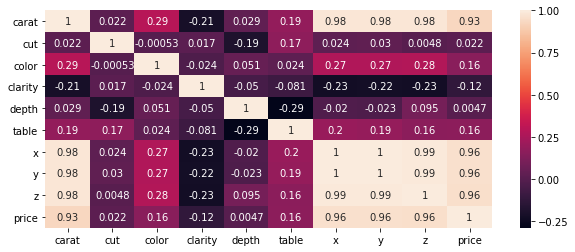

In [26]:
plt.figure(figsize=(10,4))
sns.heatmap(df3.corr(),annot=True)
#Multicollinearity is existing.

In [27]:
X1=df3.copy()
X1.drop('price',axis=1,inplace=True)
Y1=df3.pop('price')

In [28]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=.30,random_state=0)

In [29]:
data_train1=pd.concat([X_train1,y_train1],axis=1)
#Concating and Calculating the same using STATSMODEL
data_train1.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
8747,1.19,2,1,3,60.2,57.0,6.84,6.87,4.13,8.651199
13821,0.36,2,0,5,61.0,56.0,4.63,4.59,2.81,6.997596
13582,1.20,1,5,2,63.1,58.0,6.66,6.72,4.22,8.466321
9952,0.24,4,1,6,60.7,60.0,4.01,4.06,2.45,6.184149
25530,0.50,4,2,7,61.8,56.0,5.11,5.15,3.17,7.626570


In [31]:

#With various permutation and combination I got this results with gives us the best accuracy along with the least VIF scores.
#Making model mentioning all the features gave us the result of 95.1 percent but gave very high VIF value as well
#Hence chose above features to get the most optimum results
lm3 = smf.ols(formula='price ~ color + clarity + x ',data=data_train1).fit()

In [32]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.127e+05
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:34:35   Log-Likelihood:                 635.06
No. Observations:               18853   AIC:                            -1262.
Df Residuals:                   18849   BIC:                            -1231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4524      0.011    230.799      0.0

In [33]:
lm3.params

Intercept    2.452438
color       -0.070634
clarity      0.061969
x            0.920610
dtype: float64

In [34]:

vif2=[variance_inflation_factor(data_train1[['color','clarity','x']].values,ix) 
 for ix in range(data_train1[['color','clarity','x']].shape[1])]

In [36]:
clf3=LinearRegression()

In [35]:
i=0
for column in data_train1[['color','clarity','x']].columns:
    if i < 5:
        print (column , "---> ", vif2[i])
        i=i+1
#VIF is not very high

color --->  3.654174232574307
clarity --->  4.340332635216739
x --->  6.693204279345197


In [38]:
X_train2=X_train1.copy()
X_train2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)
X_test2=X_test1.copy()
X_test2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)

In [39]:
clf3.fit(X_train2,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
clf3.score(X_train2,y_train1) #Training set accuracy

0.9472081247487469

In [41]:
clf3.score(X_test2,y_test1) #Testing set accuracy 

0.9468039003309685

In [42]:
mse_test1=np.mean((clf3.predict(X_test2)-y_test1)**2)
mse_train1=np.mean(clf3.predict(X_train2)-y_train1)**2

In [44]:
import math

In [45]:
print('Root mean squared error for Test set is',math.sqrt(mse_test1))
print('Root mean squared error for Training set is',math.sqrt(mse_train1))

Root mean squared error for Test set is 0.23573060618431743
Root mean squared error for Training set is 2.1911196255371996e-16


In [275]:
clf3.intercept_

2.4524377100425214

In [276]:
for idx,col_name in enumerate(X_train2.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf3.coef_[idx]))


The coefficient for color  is -0.07063375156153978 
The coefficient for clarity  is 0.0619693025627653 
The coefficient for x  is 0.9206095882387271 


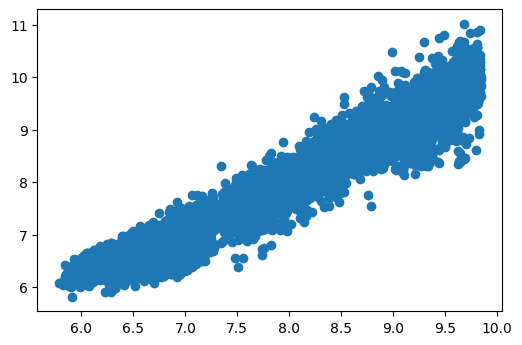

In [277]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train1,clf3.predict(X_train2)) #Scatter plot for training set

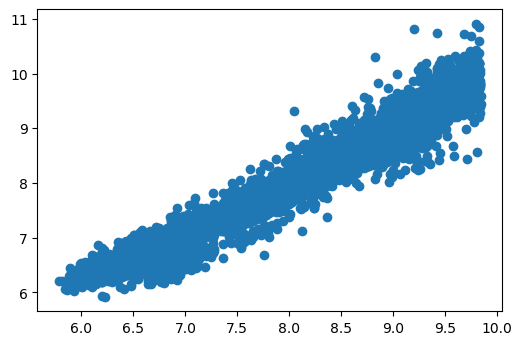

In [278]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_test1,clf3.predict(X_test2)) #Scatter plot for testing set

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

#### The linear equation that is formed using coefficients and intercept is :-
 The coefficient for color  is -0.07063375156153978 
 
 The coefficient for clarity  is 0.0619693025627653 
 
 The coefficient for x  is 0.9206095882387271 
 
 The intercept is 2.45243
### log (Price) = -0.0706* color +  0.0619*clarity + 0.9206*x + 2.4524
### math.exp(Price) can be used to get the actual price

### OUTCOMES
	The linear regression equation that we form is log (Price) = -0.0706* color + 0.0619clarity + 0.9206x + 2.4524 or
 Price =e^ (-0.0706* color + 0.0619clarity + 0.9206x + 2.4524).
 
	Looking into the equation, we can say that the x variable which is the length of the zirconia is the most important factor for deciding the price. 

	As there’s a good positive correlation between carat, x, y, z we can say that all the features are of utmost important to determine price. As if any of the features get deteriorated, it will going to affect the other correlated features, resulting in effecting the price.  

	Clarity has also a major role in deciding the price of zirconia.


### SUGGESTIONS
	From looking at the countplot of clarity , we can see that the production of high clarity zirconia is less. There’s no zirconia with FL remarks. Moreover zirconia with IF, VVS1, VVS2 labels are less. Company should try to provide clearer zirconia as it directly impacts the price.

	As the price of zirconia is hugely dependent on x & x and carat is highly correlated. The company should try to manufacture high carat zirconia to get better price.
 
	The price of Premium and Fair cut is maximum. Hence we should try to maximize the manufacturing of zirconia with such cuts.


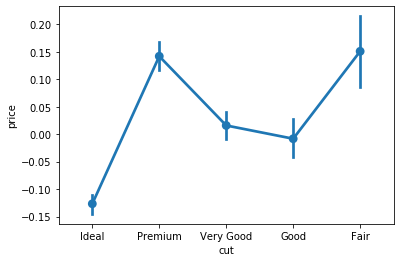

In [80]:
sns.pointplot(x=df1['cut'],y=df1['price']) 